# Instruction

The dataset we will use here is a simulated dataset of online purchase behavior.
 The data comes from kaggle:

https://www.kaggle.com/rakeshrau/social-network-ads

There are three predictors:
- `Gender`
- `Age`
- `EstimatedSalary`

The output is `Purchased`





In [3]:
!wget https://www.dropbox.com/s/p1fep0smi4k19ry/Social_Network_Ads.csv?dl=1 -O Social_Network_Ads.csv

zsh:1: no matches found: https://www.dropbox.com/s/p1fep0smi4k19ry/Social_Network_Ads.csv?dl=1


## Import basic packages

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load the data

In [13]:
df_sn = pd.read_csv('Social_Network_Ads.csv')

In [14]:
df_sn.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
len(df_sn)

400

In [16]:
df_sn.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## Visualise the data

In [17]:
df_sn['Gender'] = pd.get_dummies(df_sn['Gender'])['Female']

In [18]:
df_sn

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,False,19,19000,0
1,15810944,False,35,20000,0
2,15668575,True,26,43000,0
3,15603246,True,27,57000,0
4,15804002,False,19,76000,0
...,...,...,...,...,...
395,15691863,True,46,41000,1
396,15706071,False,51,23000,1
397,15654296,True,50,20000,1
398,15755018,False,36,33000,0


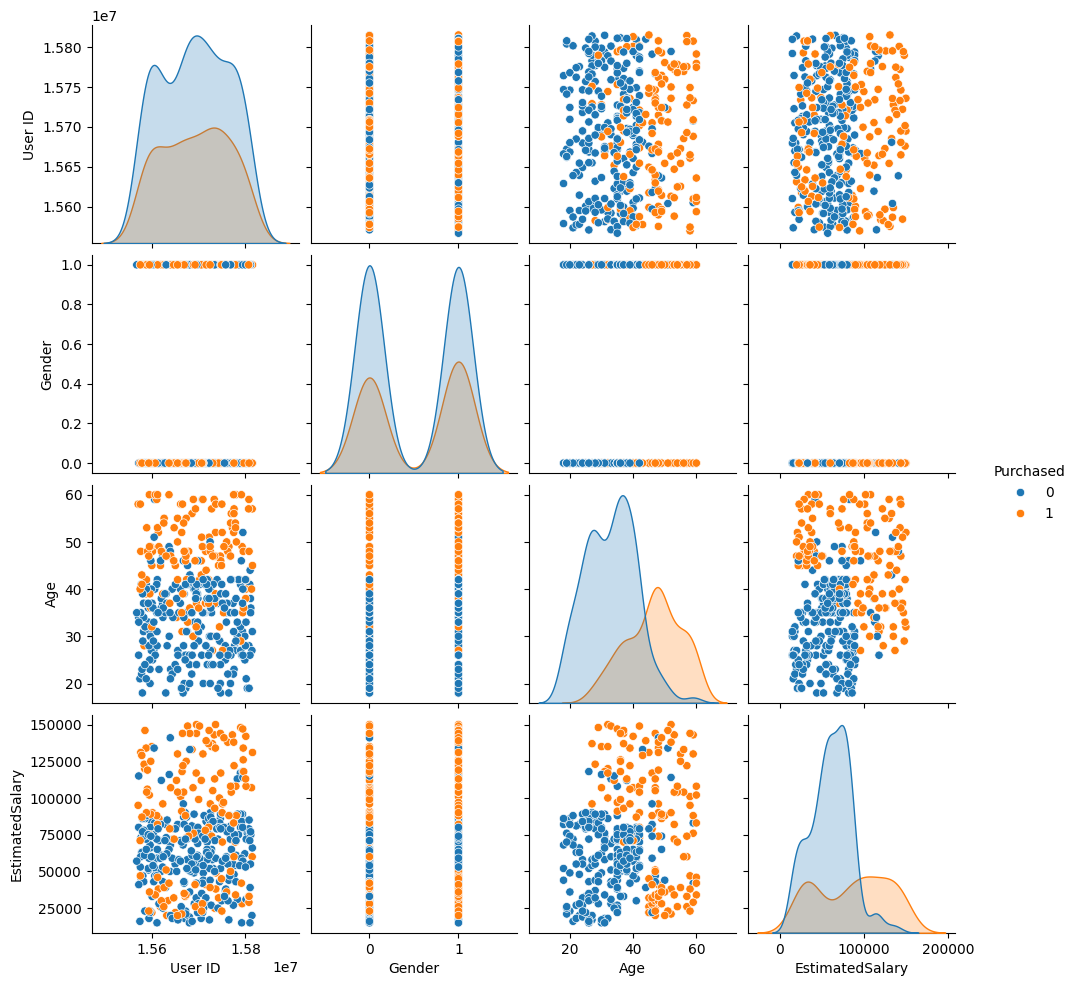

In [21]:
sns.pairplot(df_sn, hue = 'Purchased')

## Train-Test split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df_sn.iloc[:, 1:4]
y = df_sn['Purchased']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

In [25]:
print(X_train.shape)
print(X_test.shape)

(280, 3)
(120, 3)


In [26]:
X_train

,Gender,Age,EstimatedSalary
157,False,29,75000
109,True,38,80000
17,False,45,26000
347,True,54,108000
24,False,46,23000
...,...,...,...
71,True,24,27000
106,True,26,35000
270,True,43,133000
348,False,39,77000


## Data Wrangling

- Here we scale the variables using StandardScaler, which normalizes variables

In [27]:
from sklearn.preprocessing import StandardScaler
st_scaler = StandardScaler()

In [28]:
st_scaler.fit(X_train)

StandardScaler()

In [29]:
X_train = st_scaler.transform(X_train)
X_test = st_scaler.transform(X_test)

In [30]:
X_train[:3]

array([[-1.02166316, -0.84252154,  0.1301563 ],
       [ 0.97879618,  0.04175763,  0.2777019 ],
       [-1.02166316,  0.72953032, -1.31579061]])

## Fit logistic model

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model_logit = LogisticRegression()

In [33]:
model_logit.fit(X_train, y_train)

LogisticRegression()

### Model evaluations

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
pred_logit = model_logit.predict(X_test)

In [36]:
pred_logit

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [37]:
confusion_matrix(y_test, pred_logit)

array([[71,  2],
       [15, 32]])

In [38]:
print(classification_report(y_test, pred_logit))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        73
           1       0.94      0.68      0.79        47

    accuracy                           0.86       120
   macro avg       0.88      0.83      0.84       120
weighted avg       0.87      0.86      0.85       120



## KNN classifier


In [52]:
from sklearn.neighbors import KNeighborsClassifier


In [53]:
model_knn = KNeighborsClassifier(n_neighbors=5)

In [54]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
pred_knn = model_knn.predict(X_test)

In [56]:
confusion_matrix(y_test, pred_knn)

array([[68,  5],
       [ 5, 42]])

In [58]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        73
           1       0.89      0.89      0.89        47

    accuracy                           0.92       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



### Parameter tuning for KNN

- Parameter tuning will be done using cross-validation
- Reestimate the models for the different values of tuning parameters
  - For KNN, try different values of _k_
- For more information, see Chapter 5 of Gareth et al




In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score, average = 'binary', pos_label = 1)

In [60]:
model_knn2 = KNeighborsClassifier()
parameter_grid = {"n_neighbors": [3,5,7,9,11]}

In [61]:
model_knn_cv = GridSearchCV(model_knn2, parameter_grid, scoring=f1)
model_knn_cv.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]},
             scoring=make_scorer(f1_score, average=binary, pos_label=1))

In [62]:
model_knn_cv.best_params_

{'n_neighbors': 7}

In [63]:
pred_knn_cv = model_knn_cv.predict(X_test)

In [64]:
confusion_matrix(y_test, pred_knn_cv)

array([[68,  5],
       [ 4, 43]])

In [65]:
print(classification_report(y_test, pred_knn_cv))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        73
           1       0.90      0.91      0.91        47

    accuracy                           0.93       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.93      0.93      0.93       120

